# CEDA to GeoCroissant Conversion
<img src="../asset/GeoCroissant.jpg" alt="GeoCroissant" width="150" style="float: right; margin-left: 50px;">

This notebook demonstrates the conversion of CEDA metadata to GeoCroissant format for standardized geospatial data discovery.

## Overview

The Centre for Environmental Data Analysis (CEDA) hosts climate and environmental datasets including CMIP6 model outputs. This notebook shows how to:

- Search the CEDA STAC catalog for CMIP6 datasets
- Extract metadata from STAC items
- Convert to GeoCroissant format with spatial/temporal coverage
- Validate the output against the GeoCroissant schema
- Load and visualize data using the generated metadata

# Install dependencies

In [1]:
!pip install -q --upgrade matplotlib scikit-learn
!pip install -q mlcroissant ceda-datapoint
!pip install -q xarray 


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


# Create a client instance - for searching the CEDA STAC catalog

In [2]:
client = DataPointClient(org="CEDA")
client


<DataPointClient: CEDA-455969>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA

# Basic search
Perform a basic search of the CMIP6 climate model simulations dataset, filtering on experiment, activity and institution:

In [3]:
search_basic = client.search(
    collections=['cmip6'],
    query=[
        'cmip6:experiment_id=ssp585',
        'cmip6:activity_id=ScenarioMIP',
        'cmip6:institution_id=KIOST',
    ],
    max_items = 10
)

# Collect up the "cloud assets" connected with the search results
This method collects up the cloud assets, which may be Zarr, NetCDF or Kerchunk files. The latter represent an index that points to content within other files (typically NetCDF).

The files themselves can be served over a variety of protocols, including:

POSIX: local file system
HTTP(S): old-fashioned HTTP(S) access
S3: using Amazon's S3 protocol (over HTTP(S))
We identify them and then list the related products.

In [4]:
cluster = search_basic.collect_cloud_assets()
cluster


<DataPointCluster: CEDA-455969-394593-803329 (Datasets: 10)>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA
 - search_terms: {'query': ['cmip6:experiment_id=ssp585', 'cmip6:activity_id=ScenarioMIP', 'cmip6:institution_id=KIOST'], 'max_items': 10}
 - collections: ['cmip6']
 - products: 10
Products:
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsus.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsds.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rlus.gr1.v20191106-

In [6]:
product = cluster[2]
ds = product.open_dataset()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/numcodecs/__init__.py:106: DeprecationWarning: crc32c usage is deprecated since numcodecs v0.16.4. It is recommended to install google_crc32c instead.
  from numcodecs.checksum32 import CRC32, Adler32, JenkinsLookup3


In [7]:
dir(product)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_mapper',
 '_multiple_options',
 '_open_cfa',
 '_open_cog',
 '_open_kerchunk',
 '_open_zarr',
 '_prepare_dataset',
 '_set_visibility',
 'attributes',
 'bbox',
 'cloud_format',
 'collection',
 'end_datetime',
 'get_attribute',
 'help',
 'href',
 'id',
 'info',
 'meta',
 'open_asset',
 'open_dataset',
 'stac_attributes',
 'start_datetime',
 'units',
 'variables']

# Select a product and use it (as an Xarray Dataset)
A product has an .open_dataset() method, which loads it (lazily) into an xarray.Dataset, making it ready for use in the Python session.

/home/zeus/miniconda3/envs/cloudspace/lib/python3.12/site-packages/numcodecs/__init__.py:106: DeprecationWarning: crc32c usage is deprecated since numcodecs v0.16.4. It is recommended to install google_crc32c instead.
  from numcodecs.checksum32 import CRC32, Adler32, JenkinsLookup3


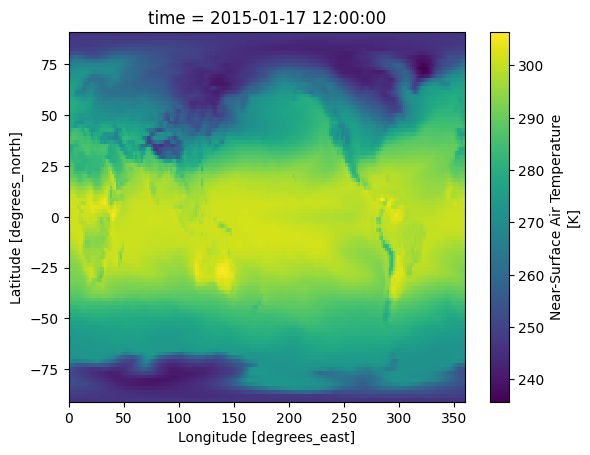

In [5]:
tas_product = None

for product in cluster:
    if "tas" in product.id:
        tas_product = product
        break

if tas_product:
    ds = tas_product.open_dataset()
    ds.tas.sel(time="2015-01-17 12:00:00").squeeze().plot()
else:
    print("tas variable not found in cluster")

In [7]:
for product in cluster:
    if "tas" in product.id:
        print(product.id)
        print(product.stac_attributes.keys())
        print(product.stac_attributes)
        break

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 

In [8]:
for product in cluster:
    print(f"\nProduct ID: {product.id}")
    print("Available stac_attributes keys:", product.stac_attributes.keys())


Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.s

In [9]:
tas_products = [p for p in cluster if "tas" in p.id]

for p in tas_products:
    print(p.id)

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file


In [10]:
# Access metadata for the selected 'tas' product
if tas_product:
    metadata = tas_product.stac_attributes
    print("STAC Metadata for Product ID:", tas_product.id)
    print("STAC Attributes:", metadata)

    # If you'd like to see more details or other attributes:
    for key, value in metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

STAC Metadata for Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
STAC Attributes: {'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.s

In [11]:
if tas_product:
    # Extract STAC metadata fields
    metadata = tas_product.stac_attributes
    item_metadata = {
        "ID": tas_product.id,
        "Type": metadata.get("type"),
        "STAC Version": metadata.get("stac_version"),
        "Collection": metadata.get("collection"),
        "Links": metadata.get("links"),
        "Bounding Box": metadata.get("bbox"),
        "Geometry": metadata.get("geometry")
    }

    # Display metadata
    for key, value in item_metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Type: Feature
STAC Version: 1.1.0
Collection: cmip6
Links: [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}]
Bounding Box: [-179.0625, -90.0, 179.0625, 90.0]
Geometry: {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}


In [12]:
print(dir(tas_product))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_mapper', '_multiple_options', '_open_cfa', '_open_cog', '_open_kerchunk', '_open_zarr', '_prepare_dataset', '_set_visibility', 'attributes', 'bbox', 'cloud_format', 'collection', 'end_datetime', 'get_attribute', 'help', 'href', 'id', 'info', 'meta', 'open_asset', 'open_dataset', 'stac_attributes', 'start_datetime', 'units', 'variables']


# Inspecting Metadata in a STAC Item

In [13]:
# Try checking the 'variables' attribute to see if the data is present there
print(tas_product.variables)

# Or inspect the 'stac_attributes' for any relevant metadata
print(tas_product.stac_attributes)

# You can also explore 'attributes' if the other two don't help
print(tas_product.attributes)

WARNING [ceda_datapoint.mixins.properties]: Attribute not found from options: ['variables', 'variable_long_name']


None
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}], 'collection': 'cmip6'}
{'title': 'CMIP6.ScenarioMIP.KIOST

# CMIP6 STAC to GeoCroissant Converter

In [14]:
import json

def cloud_product_to_geocroissant(products, stac_item):
    """Convert CEDA cloud products to valid GeoCroissant format"""
    # Get properties from STAC item
    properties = stac_item.stac_attributes.get('properties', {})
    bbox = stac_item.bbox
    geometry = stac_item.stac_attributes.get('geometry', {})
    item_id = stac_item.id
    
    # Extract CMIP6 metadata
    variable_name = properties.get('cmip6:variable_long_name', 'Unknown')
    variable_id = properties.get('cmip6:variable_id', 'tas')
    variable_units = properties.get('cmip6:variable_units', 'K')

    # Format bounding box for spatialCoverage
    if bbox and len(bbox) >= 4:
        bbox_str = f"{bbox[1]} {bbox[0]} {bbox[3]} {bbox[2]}"  # south west north east
    else:
        bbox_str = "-90 -180 90 180"

    # Build TTL-compliant GeoCroissant metadata
    croissant_metadata = {
        "@context": {
            "@language": "en",
            "@vocab": "https://schema.org/",
            "citeAs": "cr:citeAs",
            "column": "cr:column",
            "conformsTo": "dct:conformsTo",
            "cr": "http://mlcommons.org/croissant/",
            "geocr": "http://mlcommons.org/croissant/geocr/",
            "rai": "http://mlcommons.org/croissant/RAI/",
            "dct": "http://purl.org/dc/terms/",
            "sc": "https://schema.org/",
            "data": {
                "@id": "cr:data",
                "@type": "@json"
            },
            "examples": {
                "@id": "cr:examples",
                "@type": "@json"
            },
            "dataType": {
                "@id": "cr:dataType",
                "@type": "@vocab"
            },
            "extract": "cr:extract",
            "field": "cr:field",
            "fileProperty": "cr:fileProperty",
            "fileObject": "cr:fileObject",
            "fileSet": "cr:fileSet",
            "format": "cr:format",
            "includes": "cr:includes",
            "isLiveDataset": "cr:isLiveDataset",
            "jsonPath": "cr:jsonPath",
            "key": "cr:key",
            "md5": "cr:md5",
            "parentField": "cr:parentField",
            "path": "cr:path",
            "recordSet": "cr:recordSet",
            "references": "cr:references",
            "regex": "cr:regex",
            "repeated": "cr:repeated",
            "replace": "cr:replace",
            "samplingRate": "cr:samplingRate",
            "separator": "cr:separator",
            "source": "cr:source",
            "subField": "cr:subField",
            "transform": "cr:transform"
        },
        "@type": "sc:Dataset",
        "name": properties.get('title', item_id),
        "description": f"CMIP6 dataset for {variable_name}",
        "version": "1.0.0",
        "license": "CC-BY-4.0",
        "conformsTo": [
            "http://mlcommons.org/croissant/1.1",
            "http://mlcommons.org/croissant/geo/1.0"
        ],
        "citeAs": f"@dataset{{ceda_cmip6_{variable_id}, title={{CEDA CMIP6 {variable_name}}}, year={{2024}}, url={{https://catalogue.ceda.ac.uk/}}}}",
        "datePublished": "2024-01-01",
        
        # Standard spatial coverage using schema.org
        "spatialCoverage": {
            "@type": "Place",
            "geo": {
                "@type": "GeoShape",
                "box": bbox_str
            }
        },
        
        # GeoCroissant properties
        "geocr:coordinateReferenceSystem": "EPSG:4326",
        "geocr:spatialResolution": {
            "@type": "QuantitativeValue",
            "value": 1.0,
            "unitText": "degrees"
        },
        "geocr:temporalResolution": {
            "@type": "QuantitativeValue", 
            "value": 1,
            "unitText": "month"
        },
        
        # Temporal coverage
        "temporalCoverage": f"{properties.get('start_datetime', '2015-01-01')}/{properties.get('end_datetime', '2100-12-31')}",
        
        "keywords": [variable_id, "cmip6", "climate", "temperature", "ceda"],
        
        "distribution": []
    }
    
    # Add products as distribution items
    for product in products:
        if not hasattr(product, 'href'):
            continue
            
        # Extract asset name from product ID
        asset_name = product.id.split('-')[-1] if '-' in product.id else product.id
        
        # Determine encoding from URL
        product_url = product.href
        if product_url.endswith('.json'):
            encoding = 'application/json'
        elif product_url.endswith(('.nc', '.netcdf')):
            encoding = 'application/netcdf'
        elif product_url.endswith('.zarr'):
            encoding = 'application/zarr'
        else:
            encoding = "application/octet-stream"
        
        file_obj = {
            "@type": "cr:FileObject",
            "@id": asset_name,
            "name": asset_name,
            "contentUrl": product_url,
            "encodingFormat": encoding,
            "sha256": "placeholder"
        }
        croissant_metadata["distribution"].append(file_obj)
    
    # Add recordSet
    if croissant_metadata["distribution"]:
        croissant_metadata["recordSet"] = [
                {
                    "@type": "cr:RecordSet",
                    "name": "climate_data",
                    "field": [
                        {
                            "@type": "cr:Field",
                            "name": variable_id,
                            "description": variable_name,
                            "dataType": "sc:Float",
                            "source": {
                                "fileObject": {
                                    "@id": croissant_metadata["distribution"][0]["@id"]
                                }
                            }
                        },
                        {
                            "@type": "cr:Field",
                            "name": "latitude",
                            "description": "Latitude coordinate",
                            "dataType": "sc:Float", 
                            "source": {
                                "fileObject": {
                                    "@id": croissant_metadata["distribution"][0]["@id"]
                                }
                            }
                        },
                        {
                            "@type": "cr:Field",
                            "name": "longitude", 
                            "description": "Longitude coordinate",
                            "dataType": "sc:Float",
                            "source": {
                                "fileObject": {
                                    "@id": croissant_metadata["distribution"][0]["@id"]
                                }
                            }
                        },
                        {
                            "@type": "cr:Field",
                            "name": "time",
                            "description": "Time coordinate",
                            "dataType": "sc:Text",
                            "source": {
                                "fileObject": {
                                    "@id": croissant_metadata["distribution"][0]["@id"]
                                }
                            }
                        }
                    ]
                }
            ]
    
    return croissant_metadata

# Test the Converter

In [15]:
# Use existing variables from above cells
_, stac_item = next(iter(search_basic.items.items()))
geocroissant_data = cloud_product_to_geocroissant(tas_products, stac_item)

# Save and display result
with open('ceda_cmip6_geocroissant.json', 'w') as f:
    json.dump(geocroissant_data, f, indent=2)

print(f"✓ Generated GeoCroissant with {len(geocroissant_data['distribution'])} file(s)")

✓ Generated GeoCroissant with 1 file(s)


In [16]:
!mlcroissant validate --jsonld=ceda_cmip6_geocroissant.json

I0216 15:31:01.389513 130824707262272 validate.py:53] Done.


# Visualization with GeoCrossiant

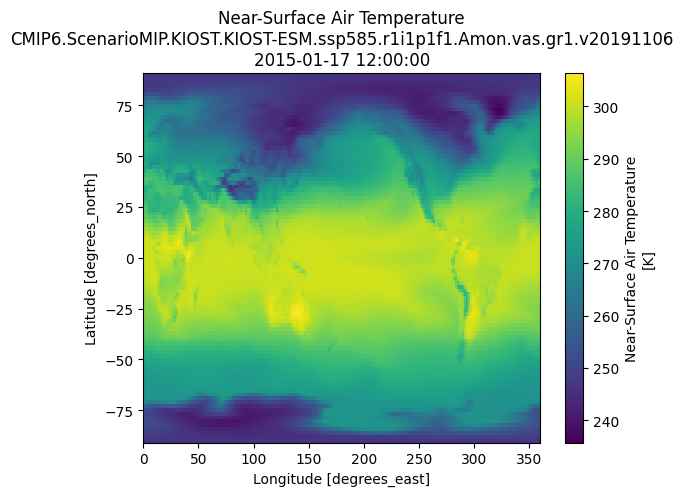

In [27]:
import json
import matplotlib.pyplot as plt

# Load GeoCroissant metadata
with open("ceda_cmip6_geocroissant.json", "r") as file:
    metadata = json.load(file)

# Use the tas_product and create visualization
if tas_product:
    ds = tas_product.open_dataset()
    tas = ds["tas"].sel(time="2015-01-17 12:00:00").squeeze()
    tas.plot()
    plt.title(f"Near-Surface Air Temperature\n{metadata.get('name', 'CEDA CMIP6')}\n2015-01-17 12:00:00")
    plt.xlabel("Longitude [degrees_east]")
    plt.ylabel("Latitude [degrees_north]")
    plt.show()